In [1]:
import sys

# Add custom python modules
sys.path.append('../PythonModules/parameterAnalysis')

# Import custom python modules
import parameterAnalysis as parAnalysis

# Reload custom modules for changes
import importlib as importlib

importlib.reload(parAnalysis);

In [2]:
dataFrameDict = parAnalysis.createDataframe('input/config.json')

In [3]:
experimentName = 'etaScaling_polynomialSeriesDeg3_randomSearch_RUN_II_SP_NOMINAL'
df = dataFrameDict[experimentName]
df.head()

baseLineMean  \
0  {'eratio': 0.8303858251835943, 'fracs1': 0.160...   
1  {'eratio': 0.8758262296044187, 'fracs1': 0.146...   
2  {'eratio': 0.8648783096707267, 'fracs1': 0.146...   
3  {'eratio': 0.8684876578610807, 'fracs1': 0.144...   
4  {'eratio': 0.8747718434523334, 'fracs1': 0.145...   

                                         baseLineRMS  baseline_error_rate  \
0  {'eratio': 0.2565123537365691, 'fracs1': 0.093...             0.054753   
1  {'eratio': 0.2228818328946117, 'fracs1': 0.053...             0.092039   
2  {'eratio': 0.2429747421707521, 'fracs1': 0.035...             0.162854   
3  {'eratio': 0.23456477192570788, 'fracs1': 0.03...             0.157688   
4  {'eratio': 0.22682601523816617, 'fracs1': 0.03...             0.170496   

   bestError                                           bestPars  \
0   0.000509  {'parA': 0.3004, 'parB': 0.3898, 'parC': -0.51...   
1   0.004238  {'parA': 0.2118, 'parB': 0.4482, 'parC': -0.56...   
2   0.004541  {'parA': 0.2872, 'parB': 0.3488, 'parC': -0.46...   
3   0.001350  {'parA': 0.2441, 'parB': 0.3761, 'parC': -0.43...   
4   0.004960  {'parA': 0.2872, 'parB': 0.3488, 'parC': -0.46...   

                                        blackBoxMean  completedTrials  \
0  {'weta1': 0.594178, 'wtots1': 1.80438, 'fracs1...            418.0   
1  {'weta1': 0.606128, 'wtots1': 1.70969, 'fracs1...            349.0   
2  {'weta1': 0.608714, 'wtots1': 1.76796, 'fracs1...            399.0   
3  {'weta1': 0.603033, 'wtots1': 1.76515, 'fracs1...            444.0   
4  {'weta1': 0.609117, 'wtots1': 1.76621, 'fracs1...            369.0   

      intE  intMinEta  layer  nEvents  pdgId  \
0  32768.0        0.0    1.0   1000.0   22.0   
1  32768.0        5.0    1.0   1000.0   22.0   
2  32768.0       10.0    1.0   1000.0   22.0   
3  32768.0       15.0    1.0   1000.0   22.0   
4  32768.0       20.0    1.0   1000.0   22.0   

                                  percentageIncrease  \
0  {'weta1': 4.462587460875511, 'wtots1': 5.31475...   
1  {'weta1': 3.3908411860466003, 'wtots1': 4.5404...   
2  {'weta1': 3.2011423259973526, 'wtots1': 5.6178...   
3  {'weta1': 3.2686054706573486, 'wtots1': 5.8960...   
4  {'weta1': 3.400934860110283, 'wtots1': 5.67270...   

                                          targetMean  
0  {'weta1': 0.592805373650075, 'wtots1': 1.79697...  
1  {'weta1': 0.6047288759614301, 'wtots1': 1.7287...  
2  {'weta1': 0.6031545250033614, 'wtots1': 1.7517...  
3  {'weta1': 0.6023585991643698, 'wtots1': 1.7554...  
4  {'weta1': 0.6049227289154696, 'wtots1': 1.7490...

In [186]:
condition = (df.intE == 32768) & (df.intMinEta == 0)
list(df[condition]['baseLineMean'].values).pop()


{'eratio': 0.8303858251835943,
 'fracs1': 0.16025935610395575,
 'reta': 0.16025935610395575,
 'rphi': 0.16025935610395575,
 'weta1': 0.5674810360906474,
 'weta2': 0.16025935610395575,
 'wtots1': 1.70629045128945}

In [5]:
import matplotlib.pyplot as plt
plt.hist(df.completedTrials)

(array([ 1.,  0.,  0.,  3.,  7., 17., 36., 42., 15.,  5.]),
 array([152. , 187.8, 223.6, 259.4, 295.2, 331. , 366.8, 402.6, 438.4,
        474.2, 510. ]),
 <BarContainer object of 10 artists>)

In [4]:
def plotOptimalParameters(intE = None, intMinEta = None, maxEvalError = None, 
                          minNumberTrials = None, xlim = None, xLog = False, label = ''):

    plt.rcParams["figure.figsize"] = (5,5)

    # Get dataframe
    if intE:
        df = createDataFrame(intEnergyList = [intE])
        xVarName = 'intMinEta'
        plt.xlabel(r'|$\eta$|')
        
    elif intMinEta:
        df = createDataFrame(intMinEtaList = [intMinEta])
        xVarName = 'intE'
        plt.xlabel(r'Energy')
    else:
        raise Exception('Must specify either one intE or one intMinEta')

    parNameList = ['parA', 'parB', 'parC', 'parD']

    # Filter dataframe for maximum allowed evaluation error
    if maxEvalError:      df = df[df.evaluationError < maxEvalError]
    if minNumberTrials:   df = df[df.nTrials > minNumberTrials]
    
    
    for parName in parNameList:
    
        plt.errorbar(df[xVarName].to_list(), df[parName].to_list(), 
                     yerr = df['evaluationError'].to_list(), fmt="*", label = parName)
    
    atlas.atlasify(' Work In Progress', "Simulation, " + label)
    plt.legend(frameon=False)
    plt.ylim(-1, 1.5)
    plt.xlim(xlim)
    plt.ylabel('Optimal model parameters')
    if xLog: plt.xscale('log')
    plt.tight_layout()
    
def plotEvaluationError(intEList = [32768, 65536, 131072, 262144, 524288, 1048576], maxEvalError = None, 
                        minNumberTrials = None, xlim = None, xLog = False, yLog=False, label = '', ylim=None):
    
    plt.rcParams["figure.figsize"] = (5,5)

    df = createDataFrame()
    plt.xlabel(r'|$\eta$|')

    parNameList = ['parA', 'parB', 'parC', 'parD']

    # Filter dataframa for maximum allowed evaluation error
    if maxEvalError:      df = df[df.evaluationError < maxEvalError]
    if minNumberTrials:   df = df[df.nTrials > minNumberTrials]
    
    atlas.atlasify(' Work In Progress', "Simulation, " + label)

    for intE in intEList:
        plt.plot(df[df.intE == intE]['intMinEta'].to_list(), df[df.intE == intE]['evaluationError'].to_list(), marker="*", 
                 label = r'$E_{\gamma}=$' + f'{str(intE)[:-3]} GeV')
    
    plt.legend(frameon=False)
    plt.ylim(ylim)
    plt.xlim(xlim)
    plt.ylabel('Evaluation error')
    if xLog: plt.xscale('log')
    if yLog: plt.yscale('log')
    plt.tight_layout()


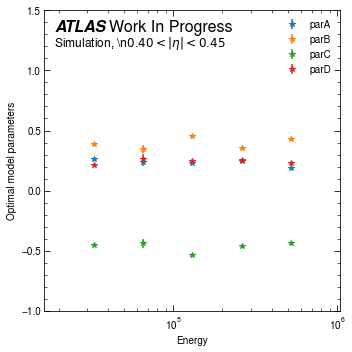

In [39]:
#Plot parameters as function of eta
for intE in [32768, 65536, 131072, 262144, 524288, 1048576]:
    plotOptimalParameters(intE=intE, minNumberTrials=800, xlim=[0, 150], 
                                     label = r'$E_{\gamma}=$' + f'{str(intE)[:-3]} GeV')
    plt.savefig(f'output/etaScaling_polynomialSeriesDeg3_randomSearch_devSearchSpace_4/optimalPrametersVsEta_{intE}.pdf')
    plt.show()
Plot parameters as funcion of energy



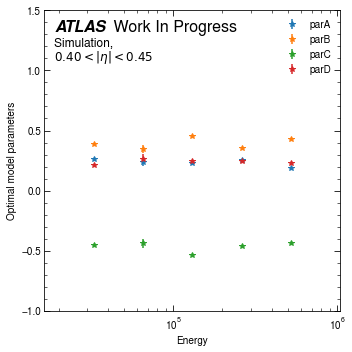

In [41]:
plotOptimalParameters(intMinEta=40, xlim = [16384, 1048576], xLog = True, 
                     label = '\n' + r'$0.40<|\eta|<0.45$')
plt.savefig(f'output/etaScaling_polynomialSeriesDeg3_randomSearch_devSearchSpace_4/optimalPrametersVsE_minEta40.pdf')

In [10]:
#Plot parameters as function of eta
plotEvaluationError(intEList = [131072], minNumberTrials=0, 
                                     label = r'')
#plt.savefig(f'output/etaScaling_polynomialSeriesDeg3_randomSearch_devSearchSpace_4/evalErrorVsEta.pdf')
plt.show()



In [5]:
df = createDataFrame()
plt.rcParams["figure.figsize"] = (10, 5)
pivot = df.pivot(index='intE', columns='intMinEta', values='nTrials')
sns.heatmap(pivot, annot=False, linewidth = 0.01,  fmt='')

<AxesSubplot:xlabel='intMinEta', ylabel='intE'>

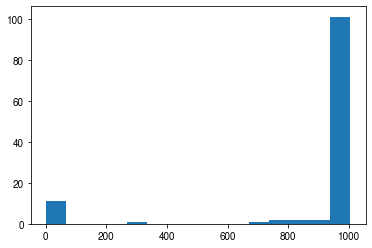

In [6]:
df = createDataFrame()
plt.rcParams["figure.figsize"] = (6, 4)
plt.hist(df.nTrials, bins=15, log=False, cumulative=False)
plt.show()

In [104]:
plt.hist2d(df.nTrials, df.evaluationError, bins=20)
plt.show()

In [6]:
df = createDataFrame()


In [9]:
df.to_csv("modelParameters.csv")